In [1]:
import pandas as pd
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import shap 
import numpy as np

# Import datasets

In [11]:
csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL3", "TSR_ALL3G_X_TRAIN.csv")
G_X_train = pd.read_csv(csv_path)

csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL3", "TSR_ALL3B_X_TRAIN.csv")
B_X_train = pd.read_csv(csv_path)

# ET_G

In [13]:
pkl_path = os.path.join("..", "..", "model", "model_pickle", "MICE2", "TSR_ALL3G_ET_CALIBRATED.pkl")
G_ET_CALIBRATED = joblib.load(pkl_path)

pkl_path = os.path.join("..", "..", "model", "model_pickle", "MICE2", "TSR_ALL3G_ET_CALIBRATED_selected.pkl")
G_ET_CALIBRATED_selected = joblib.load(pkl_path)

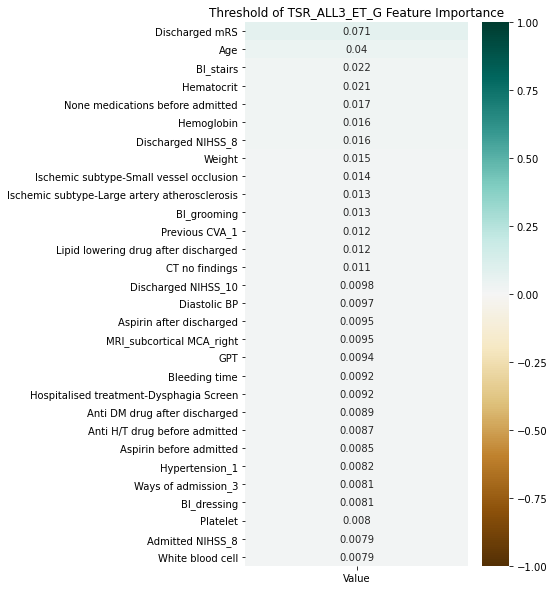

In [14]:
etG_fi = G_ET_CALIBRATED.base_estimator._final_estimator.feature_importances_
etG_fi_df = pd.DataFrame(etG_fi)
etG_fi_df.index = G_X_train.columns
etG_fi_df.columns = (["Value"])
etG_fi_plot = etG_fi_df.sort_values(["Value"], ascending=False).head(30)

plt.figure(figsize=(5, 10))
sns.heatmap(etG_fi_plot, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Threshold of TSR_ALL3_ET_G Feature Importance')
#plt.savefig('PLOT/TSR_ALL3/FI_G3_ET.png')
plt.show()

In [15]:
G_X_train_selected = G_X_train[etG_fi_plot.index]

etG_fi_s = G_ET_CALIBRATED_selected.base_estimator._final_estimator.feature_importances_
etG_fi_s_df = pd.DataFrame(etG_fi_s)
etG_fi_s_df.index = G_X_train_selected.columns
etG_fi_s_df.columns = (["Value"])
etG_fi_s_df = etG_fi_s_df.sort_values(["Value"], ascending=False)

 99%|===================| 24542/24754 [01:49<00:00]        

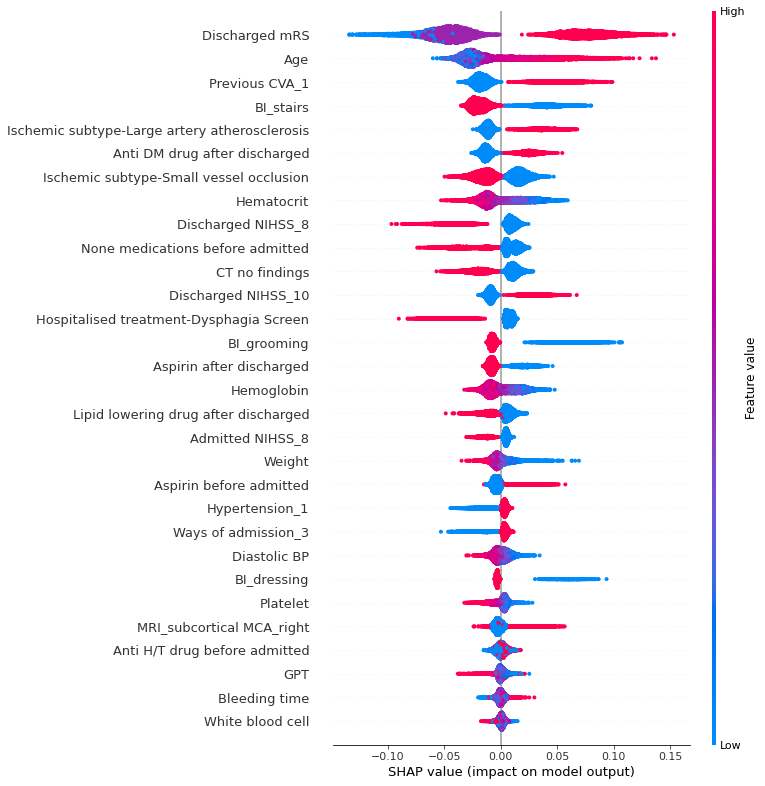

In [16]:
etG3_shap_values = shap.TreeExplainer(G_ET_CALIBRATED_selected.base_estimator._final_estimator, G_X_train_selected).shap_values(G_X_train_selected)
shap.summary_plot(etG3_shap_values[1], G_X_train_selected, max_display=30)

# XGBC_G

In [4]:
pkl_path = os.path.join("..", "..", "model", "model_pickle", "MICE2", "TSR_ALL3G_XGBC_CALIBRATED.pkl")
G_XGBC_CALIBRATED = joblib.load(pkl_path)

pkl_path = os.path.join("..", "..", "model", "model_pickle", "MICE2", "TSR_ALL3G_XGBC_CALIBRATED_selected.pkl")
G_XGBC_CALIBRATED_selected = joblib.load(pkl_path)

In [5]:
xgbcG_fi = G_XGBC_CALIBRATED.base_estimator._final_estimator.feature_importances_
xgbcG_fi_df = pd.DataFrame(xgbcG_fi)
xgbcG_fi_df.index = G_X_train.columns
xgbcG_fi_df.columns = (["Value"])
xgbcG_fi_plot = xgbcG_fi_df.reset_index(drop=False)
xgbcG_fi_plot.columns = (["Feature", "Value"])
xgbcG_fi_plot = xgbcG_fi_plot.sort_values(["Value"], ascending=True)

In [6]:
xgbcG_fi_plot_noZERO = xgbcG_fi_plot[~xgbcG_fi_plot.Value.isin([0])]
xgbcG_fi_plot_noZERO_mean = xgbcG_fi_plot_noZERO.Value.mean()
xgbcG_fi_plot_noZERO_std = xgbcG_fi_plot_noZERO.Value.std()
sigma_n = len(xgbcG_fi_plot_noZERO[xgbcG_fi_plot_noZERO.Value > xgbcG_fi_plot_noZERO_mean + xgbcG_fi_plot_noZERO_std])
sigma_n

6

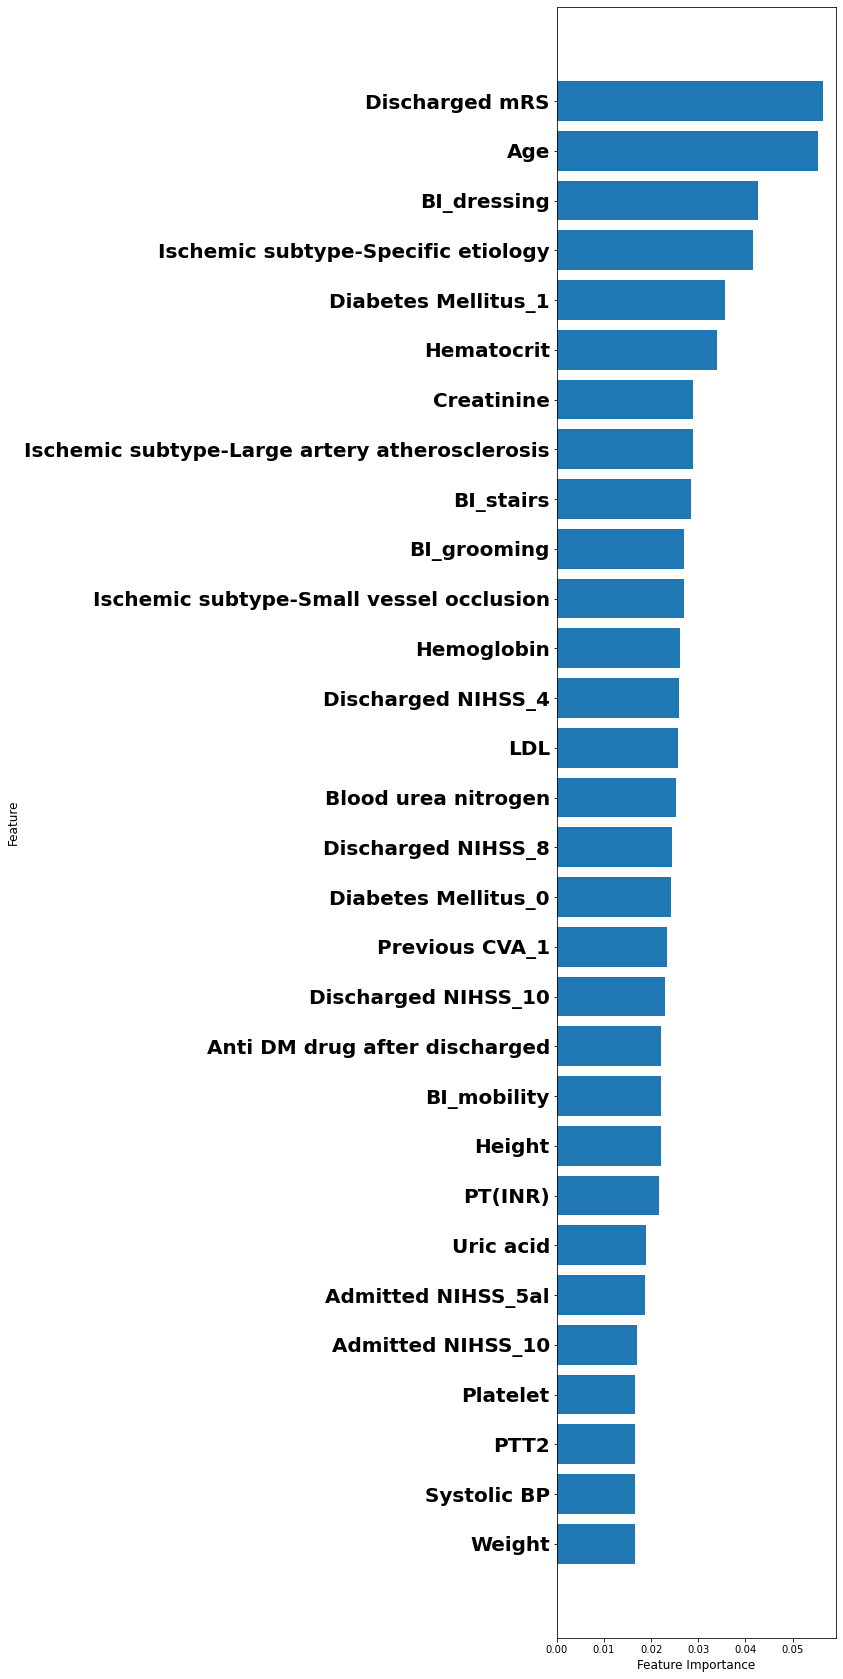

In [7]:
plt.figure(figsize=(5, 30))
plt.barh(xgbcG_fi_plot.tail(30).Feature, xgbcG_fi_plot.tail(30).Value)
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.yticks(fontsize=20)
plt.yticks(weight = 'bold')
plt.savefig('PLOT/TSR_ALL3/XGBC_G_F.png', dpi=300)
plt.show()

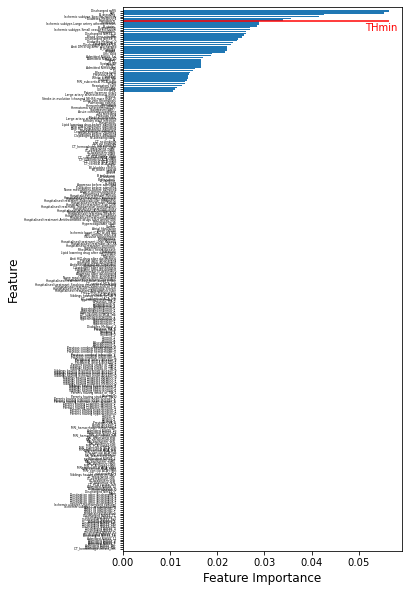

In [10]:
plt.figure(figsize=(5, 10))
plt.barh(xgbcG_fi_plot.Feature, xgbcG_fi_plot.Value)
plt.hlines(283.5,0,max(xgbcG_fi_plot.Value),color="red")
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.yticks(fontsize=3)
plt.ylim((-1,291))
plt.text(max(xgbcG_fi_plot.Value)-0.005,278, "THmin", fontsize=10, color="red")
plt.savefig('PLOT/TSR_ALL3/XGBC_G.png', dpi=300)
plt.show()

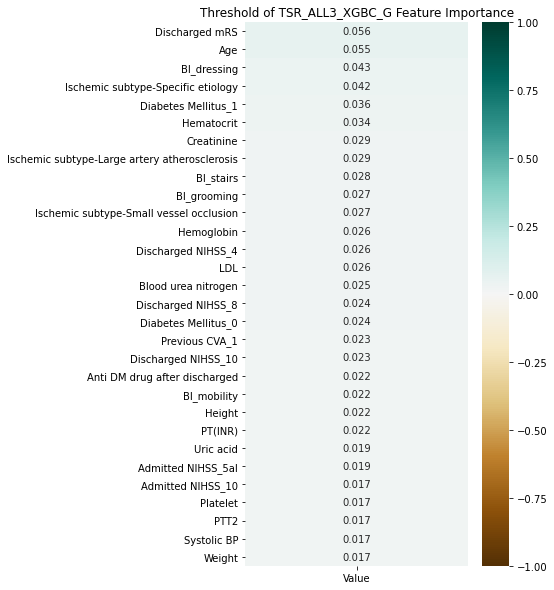

In [4]:
xgbcG_fi = G_XGBC_CALIBRATED.base_estimator._final_estimator.feature_importances_
xgbcG_fi_df = pd.DataFrame(xgbcG_fi)
xgbcG_fi_df.index = G_X_train.columns
xgbcG_fi_df.columns = (["Value"])
xgbcG_fi_plot = xgbcG_fi_df.sort_values(["Value"], ascending=False).head(30)

plt.figure(figsize=(5, 10))
sns.heatmap(xgbcG_fi_plot, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Threshold of TSR_ALL3_XGBC_G Feature Importance')
#plt.savefig('PLOT/TSR_ALL3/FI_G3_XGBC.png')
plt.show()

In [5]:
G_X_train_selected = G_X_train[xgbcG_fi_plot.index]

xgbcG_fi_s = G_XGBC_CALIBRATED_selected.base_estimator._final_estimator.feature_importances_
xgbcG_fi_s_df = pd.DataFrame(xgbcG_fi_s)
xgbcG_fi_s_df.index = G_X_train_selected.columns
xgbcG_fi_s_df.columns = (["Value"])
xgbcG_fi_s_df = xgbcG_fi_s_df.sort_values(["Value"], ascending=False)

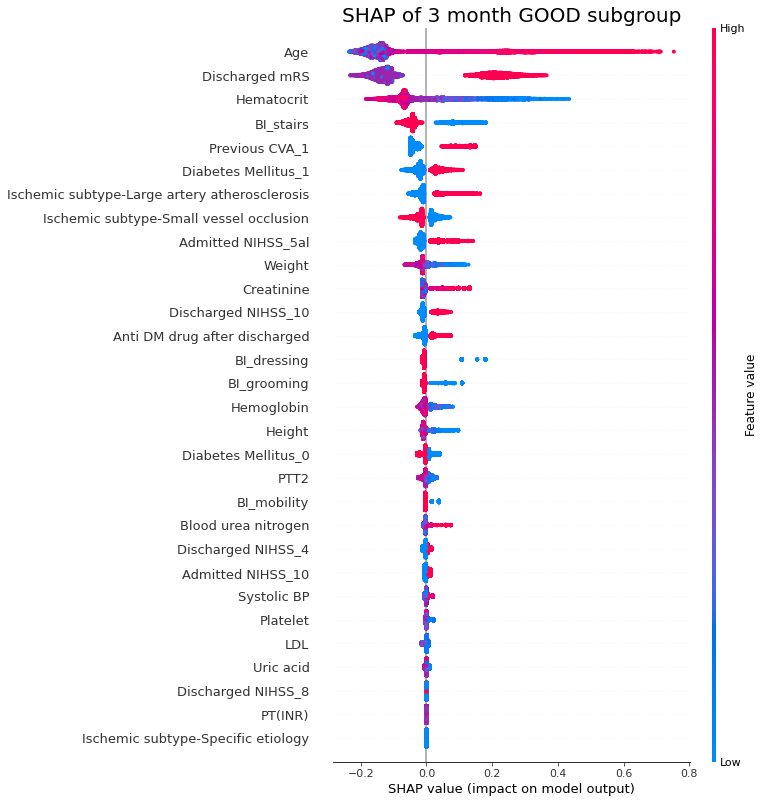

In [6]:
xgbcG3_shap_values = shap.TreeExplainer(G_XGBC_CALIBRATED_selected.base_estimator._final_estimator, G_X_train_selected).shap_values(G_X_train_selected)
plt.title('SHAP of 3 month GOOD subgroup', fontsize=20)
shap.summary_plot(xgbcG3_shap_values, G_X_train_selected, max_display=30)

# ET_B

In [22]:
pkl_path = os.path.join("..", "..", "model", "model_pickle", "MICE4", "TSR_ALL3B_ET_CALIBRATED.pkl")
B_ET_CALIBRATED = joblib.load(pkl_path)

pkl_path = os.path.join("..", "..", "model", "model_pickle", "MICE4", "TSR_ALL3B_ET_CALIBRATED_selected.pkl")
B_ET_CALIBRATED_selected = joblib.load(pkl_path)

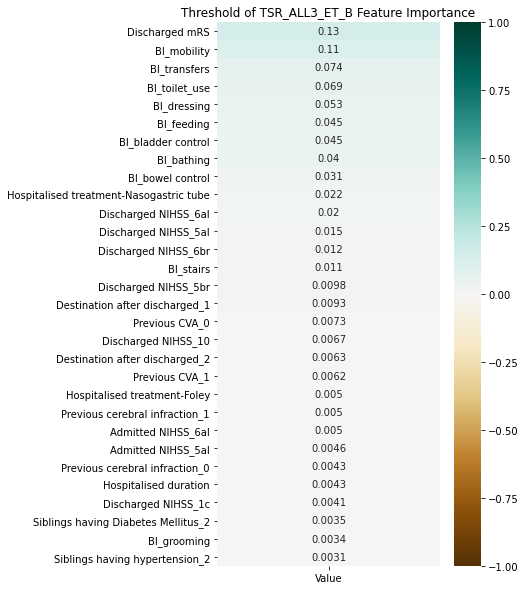

In [23]:
etB_fi = B_ET_CALIBRATED.base_estimator._final_estimator.feature_importances_
etB_fi_df = pd.DataFrame(etB_fi)
etB_fi_df.index = B_X_train.columns
etB_fi_df.columns = (["Value"])
etB_fi_plot = etB_fi_df.sort_values(["Value"], ascending=False).head(30)

plt.figure(figsize=(5, 10))
sns.heatmap(etB_fi_plot, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Threshold of TSR_ALL3_ET_B Feature Importance')
#plt.savefig('PLOT/TSR_ALL3/FI_B3_ET.png')
plt.show()

In [24]:
B_X_train_selected = B_X_train[etB_fi_plot.index]

etB_fi_s = B_ET_CALIBRATED_selected.base_estimator._final_estimator.feature_importances_
etB_fi_s_df = pd.DataFrame(etB_fi_s)
etB_fi_s_df.index = B_X_train_selected.columns
etB_fi_s_df.columns = (["Value"])
etB_fi_s_df = etB_fi_s_df.sort_values(["Value"], ascending=False)

100%|===================| 26121/26176 [02:10<00:00]        

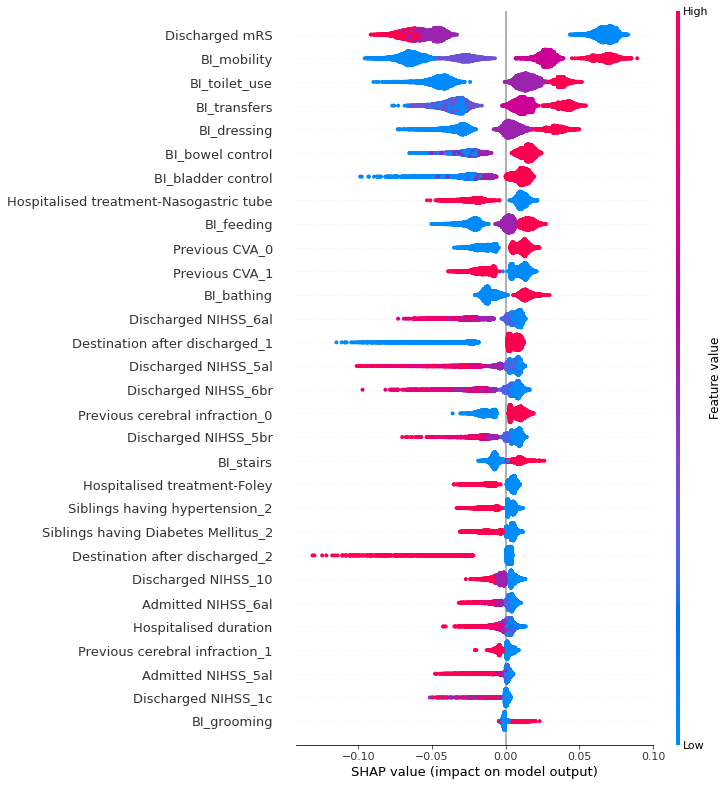

In [25]:
etB3_shap_values = shap.TreeExplainer(B_ET_CALIBRATED_selected.base_estimator._final_estimator, B_X_train_selected).shap_values(B_X_train_selected)
shap.summary_plot(etB3_shap_values[1], B_X_train_selected, max_display=30)

# XGBC_B

In [12]:
pkl_path = os.path.join("..", "..", "model", "model_pickle", "MICE3", "TSR_ALL3B_XGBC_CALIBRATED.pkl")
B_XGBC_CALIBRATED = joblib.load(pkl_path)

pkl_path = os.path.join("..", "..", "model", "model_pickle", "MICE3", "TSR_ALL3B_XGBC_CALIBRATED_selected.pkl")
B_XGBC_CALIBRATED_selected = joblib.load(pkl_path)

In [13]:
xgbcB_fi = B_XGBC_CALIBRATED.base_estimator._final_estimator.feature_importances_
xgbcB_fi_df = pd.DataFrame(xgbcB_fi)
xgbcB_fi_df.index = B_X_train.columns
xgbcB_fi_df.columns = (["Value"])
xgbcB_fi_plot = xgbcB_fi_df.reset_index(drop=False)
xgbcB_fi_plot.columns = (["Feature", "Value"])
xgbcB_fi_plot = xgbcB_fi_plot.sort_values(["Value"], ascending=True)

In [14]:
xgbcB_fi_plot_noZERO = xgbcB_fi_plot[~xgbcB_fi_plot.Value.isin([0])]
xgbcB_fi_plot_noZERO_mean = xgbcB_fi_plot_noZERO.Value.mean()
xgbcB_fi_plot_noZERO_std = xgbcB_fi_plot_noZERO.Value.std()
sigma_n = len(xgbcB_fi_plot_noZERO[xgbcB_fi_plot_noZERO.Value > xgbcB_fi_plot_noZERO_mean + xgbcB_fi_plot_noZERO_std])
sigma_n

4

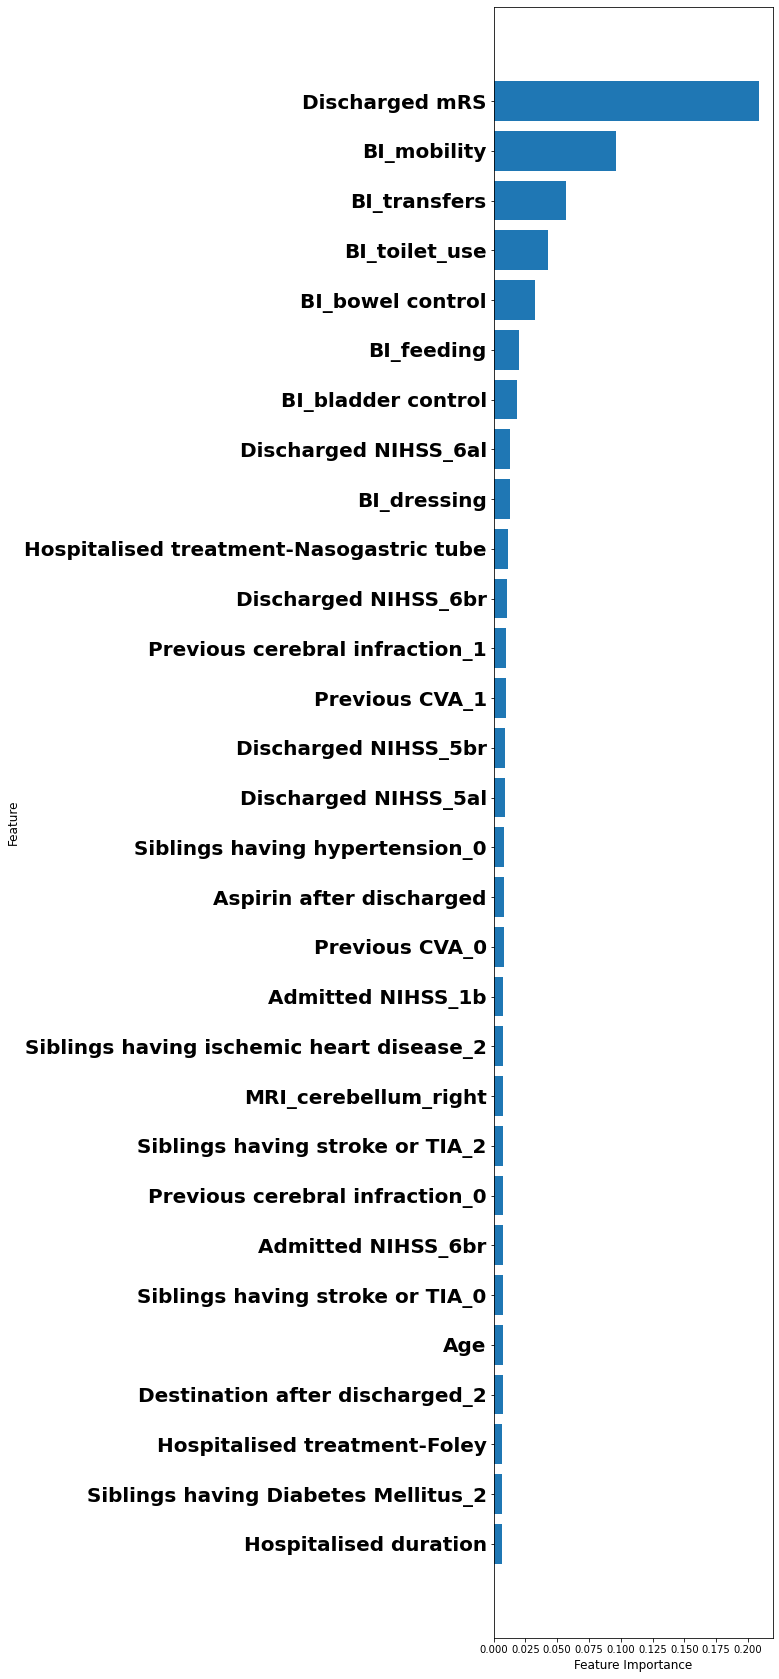

In [15]:
plt.figure(figsize=(5, 30))
plt.barh(xgbcB_fi_plot.tail(30).Feature, xgbcB_fi_plot.tail(30).Value)
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.yticks(fontsize=20)
plt.yticks(weight = 'bold')
plt.savefig('PLOT/TSR_ALL3/XGBC_B_F.png', dpi=300)
plt.show()

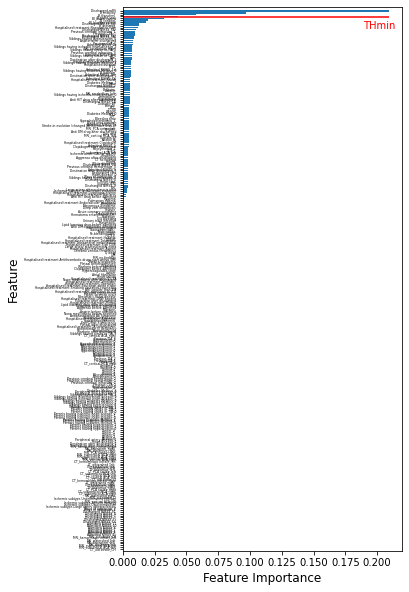

In [21]:
plt.figure(figsize=(5, 10))
plt.barh(xgbcB_fi_plot.Feature, xgbcB_fi_plot.Value)
plt.hlines(286.5,0,max(xgbcB_fi_plot.Value),color="red")
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.yticks(fontsize=3)
plt.ylim((-1,292))
plt.text(max(xgbcB_fi_plot.Value)-0.02,280, "THmin", fontsize=10, color="red")
plt.savefig('PLOT/TSR_ALL3/XGBC_B.png', dpi=300)
plt.show()

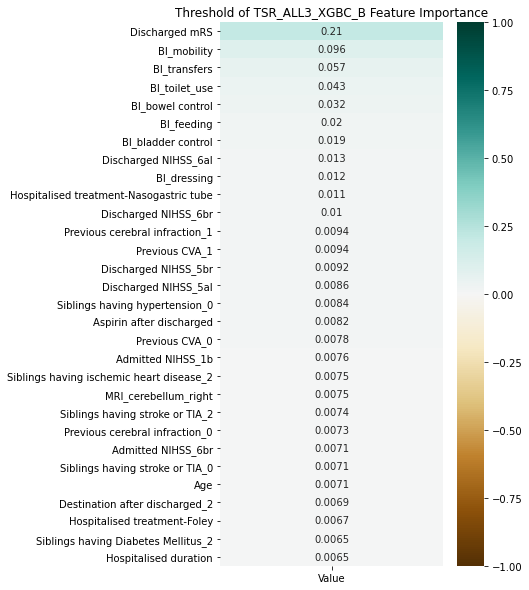

In [9]:
xgbcB_fi = B_XGBC_CALIBRATED.base_estimator._final_estimator.feature_importances_
xgbcB_fi_df = pd.DataFrame(xgbcB_fi)
xgbcB_fi_df.index = B_X_train.columns
xgbcB_fi_df.columns = (["Value"])
xgbcB_fi_plot = xgbcB_fi_df.sort_values(["Value"], ascending=False).head(30)

plt.figure(figsize=(5, 10))
sns.heatmap(xgbcB_fi_plot, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Threshold of TSR_ALL3_XGBC_B Feature Importance')
#plt.savefig('PLOT/TSR_ALL3/FI_B3_XGBC.png')
plt.show()

In [10]:
B_X_train_selected = B_X_train[xgbcB_fi_plot.index]

xgbcB_fi_s = B_XGBC_CALIBRATED_selected.base_estimator._final_estimator.feature_importances_
xgbcB_fi_s_df = pd.DataFrame(xgbcB_fi_s)
xgbcB_fi_s_df.index = B_X_train_selected.columns
xgbcB_fi_s_df.columns = (["Value"])
xgbcB_fi_s_df = xgbcB_fi_s_df.sort_values(["Value"], ascending=False)

 99%|===================| 12920/13088 [00:11<00:00]       

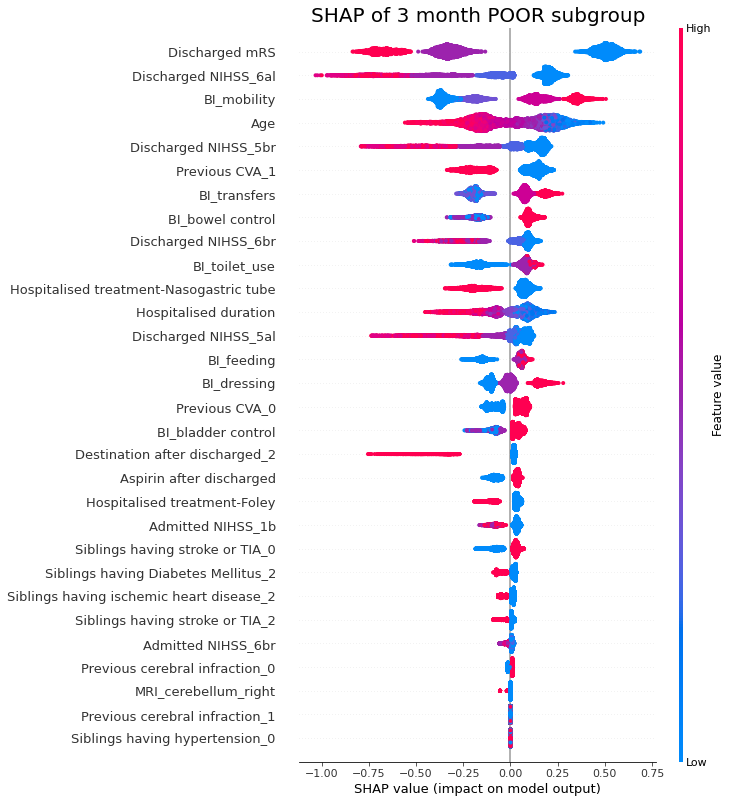

In [11]:
xgbcB3_shap_values = shap.TreeExplainer(B_XGBC_CALIBRATED_selected.base_estimator._final_estimator, B_X_train_selected).shap_values(B_X_train_selected)
plt.title('SHAP of 3 month POOR subgroup', fontsize=20)
shap.summary_plot(xgbcB3_shap_values, B_X_train_selected, max_display=30)

In [19]:
a = pd.DataFrame(etG_fi_plot)
a = a.reset_index(drop=False)
vals = np.abs(etG3_shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(G_X_train_selected.columns,sum(vals))),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
b = feature_importance.head(30)
b = b.reset_index(drop=True)

c = pd.concat([a,b], axis = 1)
c.columns = ["model_etG3_index","model_etG3_value","shap_etG3_index","shap_etG3_value"]
csv_path = os.path.join("INFO", "TSR_ALL3", "etG3_FI.csv")
c.to_csv(csv_path)

In [20]:
a = pd.DataFrame(xgbcG_fi_plot)
a = a.reset_index(drop=False)
vals = np.abs(xgbcG3_shap_values)
feature_importance = pd.DataFrame(list(zip(G_X_train_selected.columns,sum(vals))),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
b = feature_importance.head(30)
b = b.reset_index(drop=True)

c = pd.concat([a,b], axis = 1)
c.columns = ["model_xgbcG3_index","model_xgbcG3_value","shap_xgbcG3_index","shap_xgbcG3_value"]
csv_path = os.path.join("INFO", "TSR_ALL3", "xgbcG3_FI.csv")
c.to_csv(csv_path)

In [21]:
a = pd.DataFrame(etB_fi_plot)
a = a.reset_index(drop=False)
vals = np.abs(etB3_shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(B_X_train_selected.columns,sum(vals))),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
b = feature_importance.head(30)
b = b.reset_index(drop=True)

c = pd.concat([a,b], axis = 1)
c.columns = ["model_etB3_index","model_etB3_value","shap_etB3_index","shap_etB3_value"]
csv_path = os.path.join("INFO", "TSR_ALL3", "etB3_FI.csv")
c.to_csv(csv_path)

In [22]:
a = pd.DataFrame(xgbcB_fi_plot)
a = a.reset_index(drop=False)
vals = np.abs(xgbcB3_shap_values)
feature_importance = pd.DataFrame(list(zip(B_X_train_selected.columns,sum(vals))),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
b = feature_importance.head(30)
b = b.reset_index(drop=True)

c = pd.concat([a,b], axis = 1)
c.columns = ["model_xgbcB3_index","model_xgbcB3_value","shap_xgbcB3_index","shap_xgbcB3_value"]
csv_path = os.path.join("INFO", "TSR_ALL3", "xgbcB3_FI.csv")
c.to_csv(csv_path)

In [23]:
G3 = set(etB_fi_plot.index) & set(xgbcG_fi_plot.index)
B3 = set(etB_fi_plot.index) & set(xgbcB_fi_plot.index)

threshold_and = pd.DataFrame([G3, B3]).T
threshold_and.index = threshold_and.index+1
threshold_and[threshold_and.isnull()] = ""
threshold_and.columns = ["G3", "B3"]

csv_save = os.path.join("INFO", "TSR_ALL3", "Threshold_Intersection_3.csv")
threshold_and.to_csv(csv_save, index=True)